# Praktikum 4 Post Test: Regresi Linear Sederhana

## Studi Kasus: Prediksi Revenue Es Krim berdasarkan Temperature

- Dataset: `IceCreamData.csv`
- Metode: Simple Linear Regression (`Temperature` → `Revenue`)
- Bahasa: Python
- Library: pandas, numpy, matplotlib, seaborn, scikit-learn

### Tujuan
Memprediksi pendapatan penjualan es krim berdasarkan suhu udara harian dan melakukan evaluasi serta interpretasi model.

In [40]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Load & Preview Dataset

In [41]:
# Load data
df = pd.read_csv('IceCreamData.csv')
df.shape  # cek jumlah baris dan kolom

(500, 3)

In [42]:
df.head()

Temperature     Revenue  Unnamed: 2
0    24.566884  534.799028         NaN
1    26.005191  625.190122         NaN
2    27.790554  660.632289         NaN
3    20.595335  487.706960         NaN
4    11.503498  316.240194         NaN

## 2. Eksplorasi & Statistik Deskriptif

In [43]:
# Cek missing value
df.isnull().sum()

Temperature      1
Revenue          1
Unnamed: 2     500
dtype: int64

In [44]:
# Statistik deskriptif
df.describe()

Temperature     Revenue  Unnamed: 2
count   499.000000  499.000000         0.0
mean     22.186598  520.612001         NaN
std       8.039908  174.264336         NaN
min       0.000000   10.000000         NaN
25%      17.111720  405.455916         NaN
50%      22.387604  528.380417         NaN
75%      27.724420  641.626340         NaN
max      42.515280  969.291630         NaN

### Visualisasi Distribusi & Korelasi

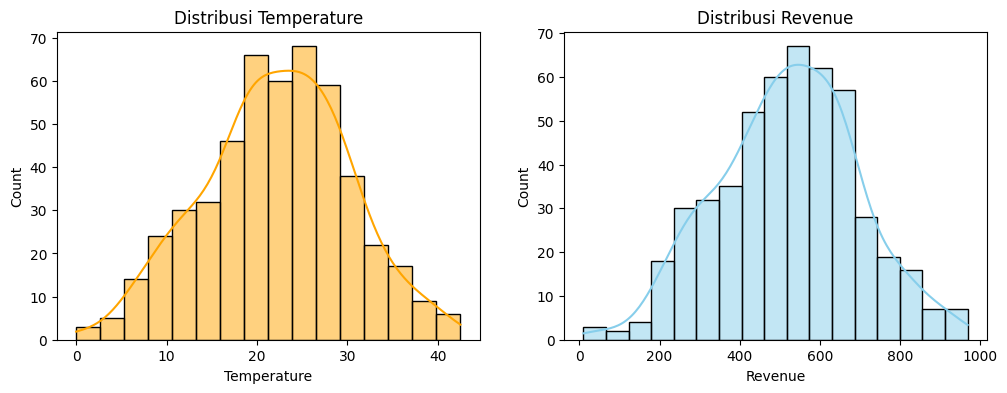

In [45]:
# Histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['Temperature'], kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribusi Temperature')
sns.histplot(df['Revenue'], kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Distribusi Revenue')
plt.show()

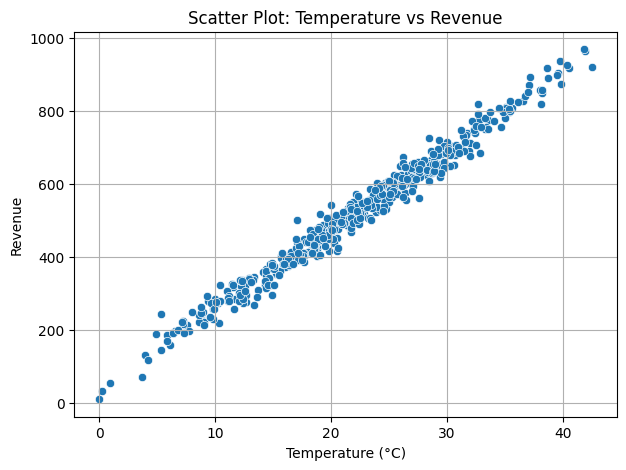

In [46]:
# Scatter plot hubungan temperature vs revenue
plt.figure(figsize=(7,5))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Scatter Plot: Temperature vs Revenue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [47]:
# Korelasi Pearson
df.corr().loc['Temperature','Revenue']

np.float64(0.9896493858537114)

## 3. Cek Outlier (Boxplot)

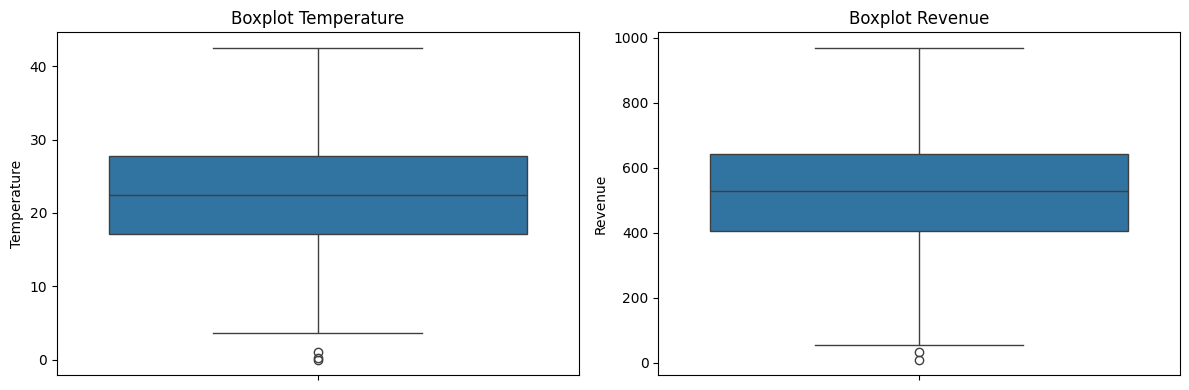

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=df['Temperature'])
plt.title('Boxplot Temperature')
plt.subplot(1,2,2)
sns.boxplot(y=df['Revenue'])
plt.title('Boxplot Revenue')
plt.tight_layout()
plt.show()

## 4. Split Data (Train/Test)
- 80% training, 20% test

In [ ]:
X = df[['Temperature']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 1), (400,), (100, 1), (100,))

## 5. Training Model Regresi Linear

In [ ]:
# Drop rows with NaN in X_train, X_test, y_train, y_test
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]
X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

linreg = LinearRegression()
linreg.fit(X_train_clean, y_train_clean)
y_pred = linreg.predict(X_test_clean)
mse = mean_squared_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 652.35
R-squared: 0.98


## 6. Evaluasi Model (Test Set)

In [ ]:
y_pred = linreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
f"R2: {r2}, MSE: {mse}, RMSE: {rmse}"

'R2: 0.9771591616993061, MSE: 652.3520545952193, RMSE: 25.541183500284777'

## 7. Visualisasi Garis Regresi

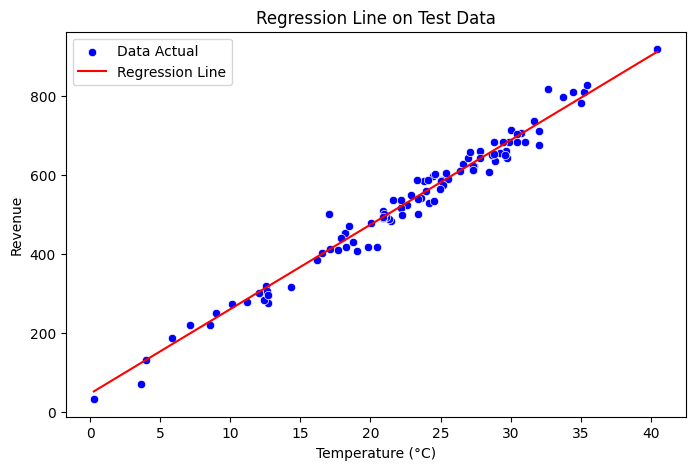

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['Temperature'], y=y_test, color='blue', label='Data Actual')
sns.lineplot(x=X_test['Temperature'], y=y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue')
plt.title('Regression Line on Test Data')
plt.legend()
plt.show()